In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import numpy as np
import os
from img_manager import *
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import cv2

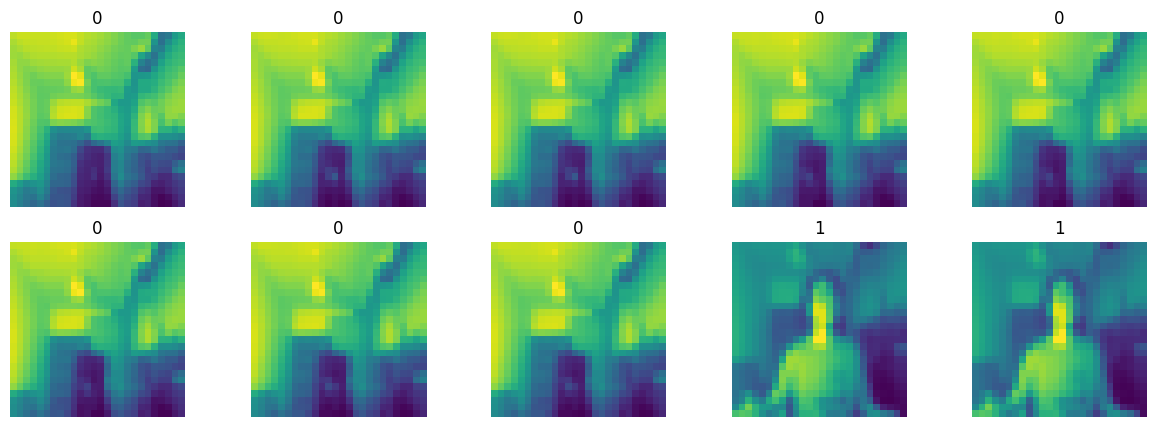

In [2]:
DIR = 'img/test/'
images, labels = load_data(DIR)


plt.figure(figsize=(15, 5))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.axis('off')
    plt.title(labels[i])
    plt.imshow(images[i])
plt.show()

In [8]:
cv2.imread("img/test/F_Humna223.png").shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [9]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [10]:
train_dataset = train.flow_from_directory('img/train/',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

validation_dataset = train.flow_from_directory('img/validation/',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 440 images belonging to 2 classes.
Found 53 images belonging to 2 classes.


In [11]:
train_dataset.class_indices

{'FHuman': 0, 'THuman': 1}

In [12]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')

])

In [13]:
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])

In [14]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs = 10,
                      validation_data=validation_dataset)

Epoch 1/10
3/3 [==============================] - 4s 815ms/step - loss: 1.3388 - accuracy: 0.3333 - val_loss: 0.6613 - val_accuracy: 0.6038
Epoch 2/10
3/3 [==============================] - 2s 623ms/step - loss: 0.7877 - accuracy: 0.4444 - val_loss: 0.6547 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 2s 676ms/step - loss: 0.6093 - accuracy: 1.0000 - val_loss: 0.8176 - val_accuracy: 0.3962
Epoch 4/10
3/3 [==============================] - 2s 641ms/step - loss: 0.6565 - accuracy: 0.5556 - val_loss: 0.4366 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 2s 688ms/step - loss: 0.3897 - accuracy: 0.8889 - val_loss: 0.3818 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 2s 621ms/step - loss: 0.4872 - accuracy: 0.6667 - val_loss: 0.1164 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 2s 610ms/step - loss: 0.0866 - accuracy: 1.0000 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 8/10
3/3 [====

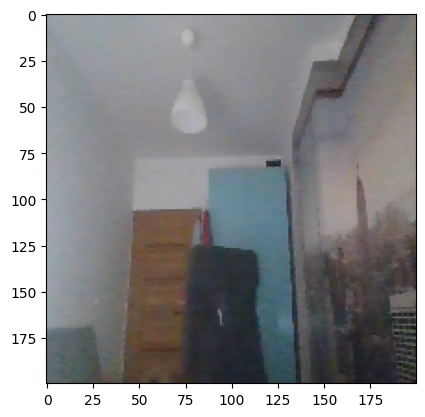

1/1 [==============================] - 4s 4s/step
Not Human


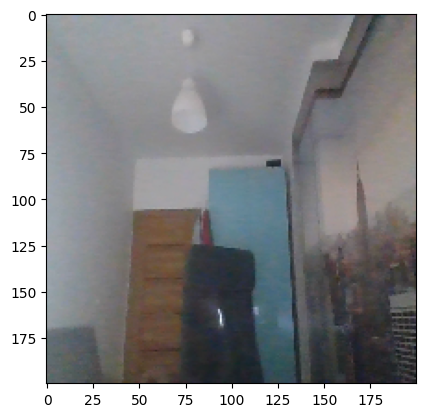

1/1 [==============================] - 0s 52ms/step
Not Human


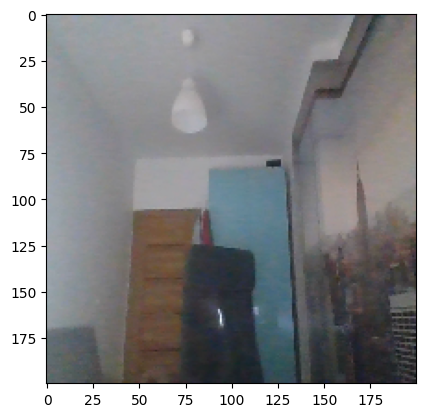

1/1 [==============================] - 0s 49ms/step
Not Human


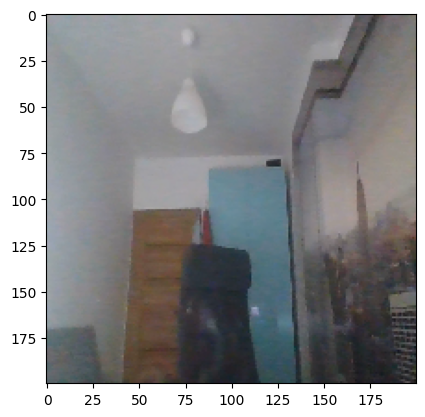

1/1 [==============================] - 0s 44ms/step
Not Human


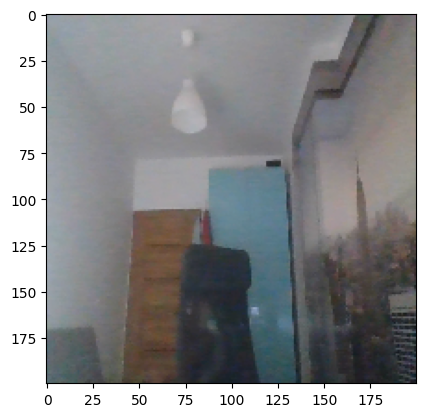

1/1 [==============================] - 0s 50ms/step
Not Human


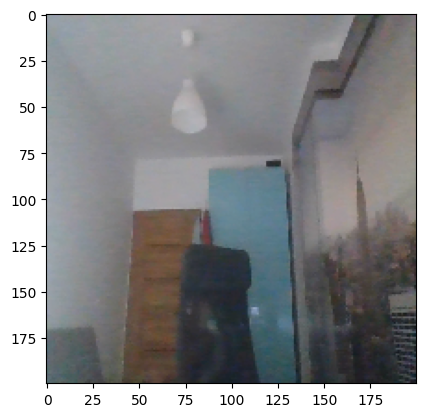

1/1 [==============================] - 0s 48ms/step
Not Human


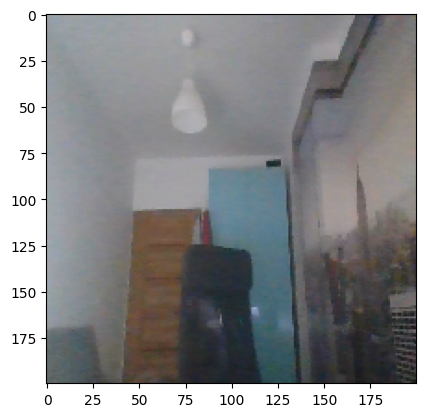

1/1 [==============================] - 0s 47ms/step
Not Human


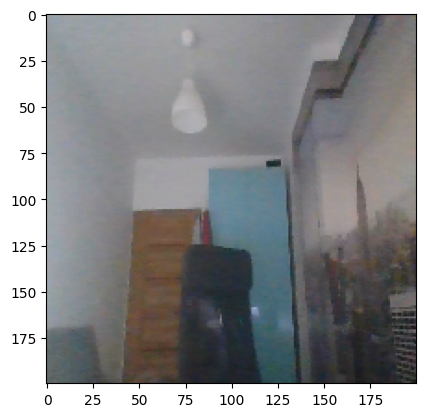

1/1 [==============================] - 0s 43ms/step
Not Human


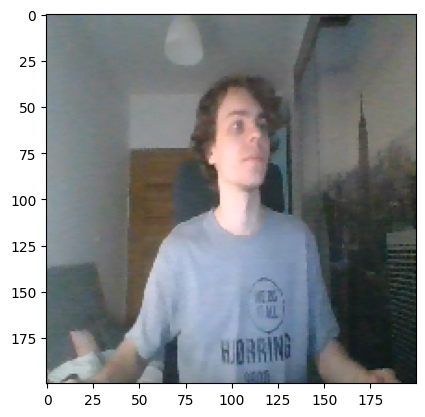

1/1 [==============================] - 0s 74ms/step
Human


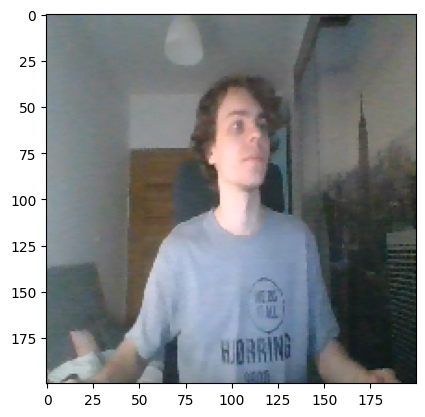

1/1 [==============================] - 0s 46ms/step
Human


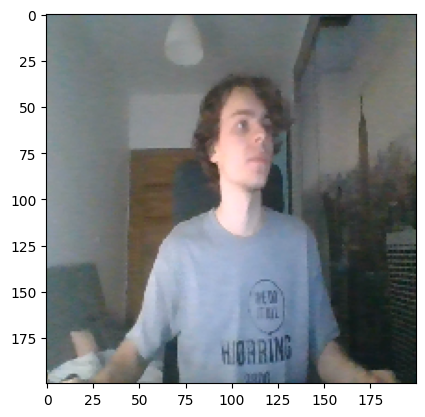

1/1 [==============================] - 0s 42ms/step
Human


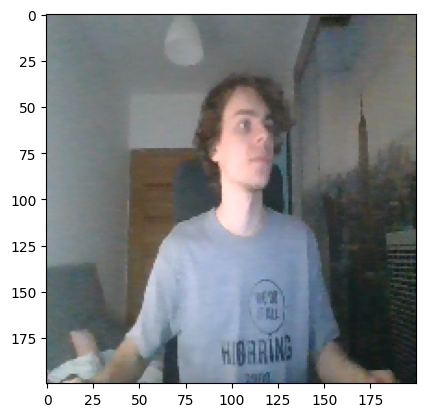

1/1 [==============================] - 0s 43ms/step
Human


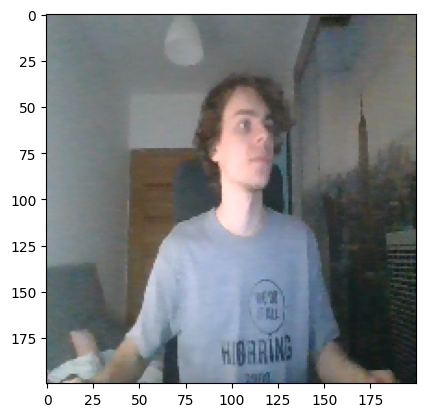

1/1 [==============================] - 0s 91ms/step
Human


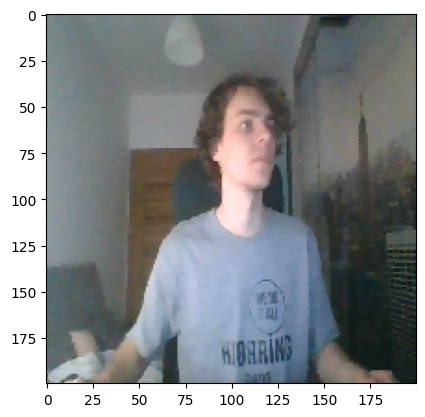

1/1 [==============================] - 0s 48ms/step
Human


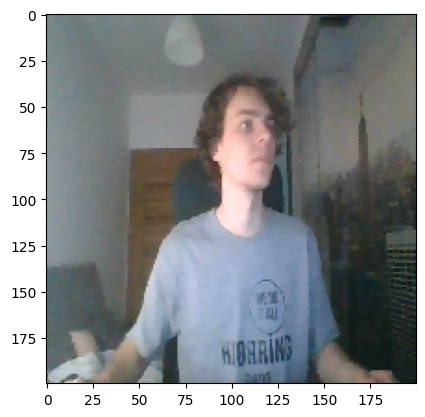

1/1 [==============================] - 0s 64ms/step
Human


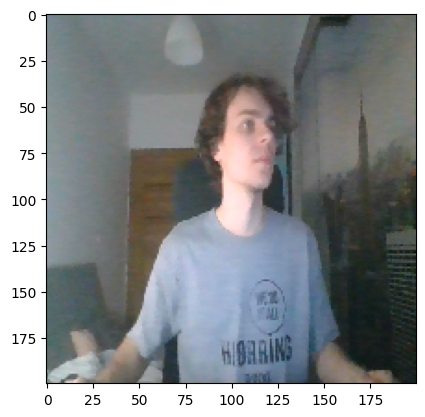

1/1 [==============================] - 0s 76ms/step
Human


In [15]:
DIR = 'img/test/'

for file in os.listdir(DIR):
        path = DIR+file
        img = image.load_img(path, target_size=(200,200))
        plt.imshow(img)
        plt.show()

        X = image.img_to_array(img)
        X = np.expand_dims(X, axis = 0)
        images = np.vstack([X])
        label = model.predict(images)

        if label == 0:
                print("Not Human")
        elif label == 1:
                print("Human")
